In [1]:
%config InlineBackend.figure_formats = ['svg']
import oscovida as ov

ov.display_binder_link("tutorial-overview-plot_daily_change.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/tutorial-overview-plot_daily_change.ipynb)

### Daily change

The second and the third graphs returned by the `overview` function 
(see the [overview](tutorial-overview-graphs.nbdata.html)
and the explanation of the [observables](tutorial-observables.nbdata.html))
show the daily changes for COVID cases and deaths respectively. Here we show how it is created internally.
We also meed to import the plotting framework:

In [2]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MONDAY, WeekdayLocator, DayLocator

Also we will need an empty Matplotlib graph object to pass onto the plotting functions.

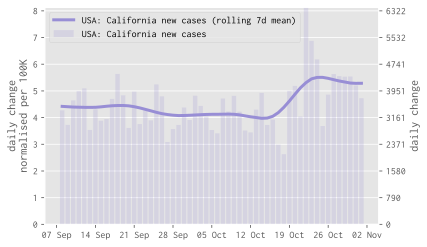

In [3]:
fig2, ax2 = plt.subplots();    # create an empty graph
country = "US"
region = "California"
weeks = 8

cases, deaths = ov.get_country_data(country, region)    # get actual data
cases = cases[- weeks * 7:]   # cut off unwanted data

# pass the data to the plotting function
ov.plot_daily_change(ax=ax2, series=cases, labels=("USA: California","cases"), color="C2", 
                     country="US", region="California");

# nicer X-axis formatting: put a tick every Monday
ax2.get_xaxis().set_major_locator(WeekdayLocator(byweekday=MONDAY)) 
ax2.get_xaxis().set_major_formatter(DateFormatter('%d %b'))

And if it we wave the population data for this region (see [here](link-here))
then we can plot a normalised graph with the data per 100K capita.
For doing that we pass regional identifiers to the plotting function. And here we will use deaths data:

The population of Germany, Bayern is 13124737 people


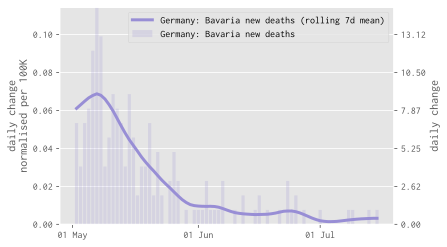

In [4]:
fig2, ax2 = plt.subplots();    # an empty graph again
country = "Germany"
region = "Bayern"
weeks = 8

cases, deaths = ov.get_country_data(country, region)
dates = "2020-05-01:2020-07-15"
date_start, date_end = dates.split(':')
deaths = deaths[date_start: date_end] # cut off unwanted data

habitants = ov.population(country, region)
print(f"The population of {country}, {region} is {habitants} people")

ov.plot_daily_change(ax=ax2, series=deaths, color="C2", labels=("Germany: Bavaria", "deaths"), 
                     country=country, region=region);

# nicer X-axis formatting: put a tick every Monday
ax2.get_xaxis().set_major_locator(DayLocator(bymonthday=1)) 
ax2.get_xaxis().set_major_formatter(DateFormatter('%d %b'))

# Other tutorials

You can find [more tutorials here](tag-tutorial.html).